In [2]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath
from Functions import *


In [18]:
# GBWA_1 = np.load("GBWA_Output.npy")
# GBNA_1 = np.load("GBNA_Output.npy")

GBWA_2=np.load("Trial_GBWA.npy")
#GBNA_2 =np.load("JNA_E=17mJ_fscan_20cm_50cm_75cm_PXeScan_1Torr_100Torr_PXeSamples=100.npy")


# JWA = np.load('JWA_Output.npy')
# JNA = np.load('JNA_Output.npy')

# GBWA_1 = GBWA_1[:,:,:,0]
# GBNA_1 = GBNA_1[:,:,:,0]
GBWA_2 = GBWA_2[:,:,:,0]

# JWA = JWA[:,:,0]
# JNA = JNA[:,:,0] 

In [6]:


b_int = np.array([f_to_b(omega0_355,20e-2),f_to_b(omega0_355,50e-2),f_to_b(omega0_355,75e-2)])

PXe_int = np.array([3,24,50])

PAr_int = np.linspace(0,700,20)

# dk_int= np.linspace(-10/f_to_b(omega0_355,50E-2),10/f_to_b(omega0_355,50E-2),25)
# PAr_int = dk_to_PAr(dk_int,24)

# PAr_int =np.array([28,32,34,37,42,43,44,45,50,60,70,90,
#                    80,95,100,105,120,
#                    150,
#                    276,277,278,283,284,285,286,287,288,290,295,300,
#                    330,345,350,355,370,
#                    450,
#                    568,574,575,576,577,576,578,583,584,585,586,587,592,
#                    615,625,635,645,660,
#                    680,695,700,705,720])
# PAr_int = np.linspace(0,1000,10)


In [5]:
CXe= -6.12E-21 #m^2
CAr = 5.33E-22 #m^2
def eval_Ropt(Pxe,b):
    return -2/(b * Pxe*Torr_to_m3*CAr) - CXe/CAr

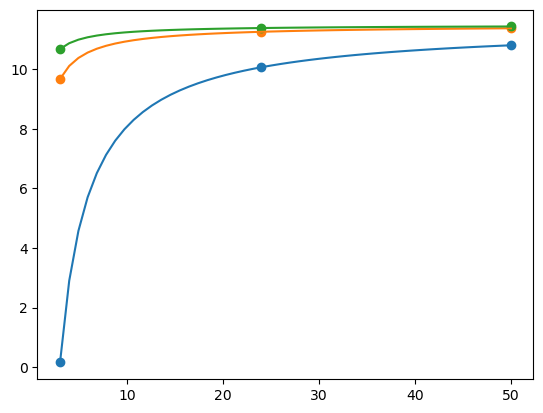

In [23]:
x = np.linspace(3,50)
plt.plot(x,eval_Ropt(x,b_int[0]))
plt.plot(x,eval_Ropt(x,b_int[1]))
plt.plot(x,eval_Ropt(x,b_int[2]))

Xe = np.array([3,24,50])
plt.scatter(Xe,eval_Ropt(Xe,b_int[0]))
plt.scatter(Xe,eval_Ropt(Xe,b_int[1]))
plt.scatter(Xe,eval_Ropt(Xe,b_int[2]))




In [24]:
print(eval_Ropt(Xe,b_int[0]))
print(eval_Ropt(Xe,b_int[1]))
print(eval_Ropt(Xe,b_int[2]))

[ 0.15835486 10.06669867 10.80274707]
[ 9.67117027 11.2558006  11.37351599]
[10.67781681 11.38163142 11.43391479]


# Phase Matching Curves With Argon

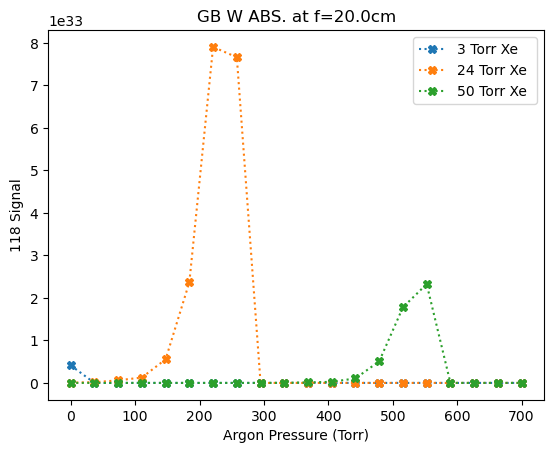

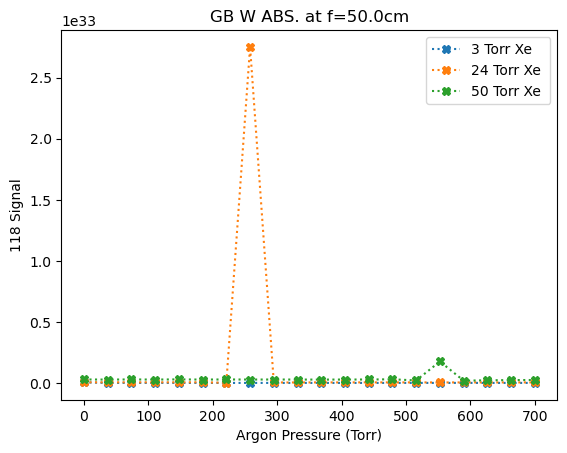

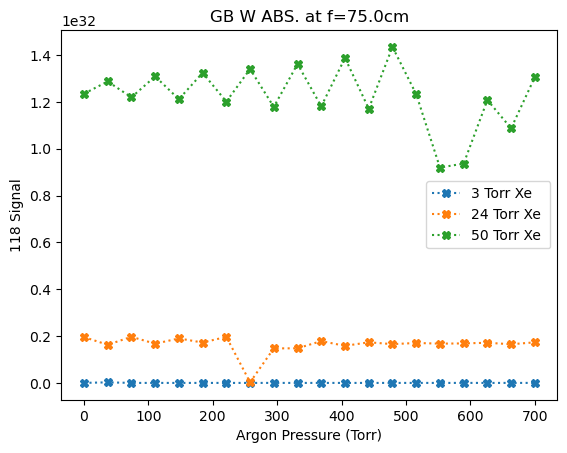

In [22]:

for b_index in range(0,3):
    for i in range(0,3):
        plt.plot(PAr_int,GBWA_2[b_index,:,i],linestyle='dotted',marker ='X')

    plt.legend(['3 Torr Xe','24 Torr Xe ','50 Torr Xe'])
    f = b_to_f(omega0_355,b_int[b_index])
    plt.title("GB W ABS. at f="+str(round(f*100,1))+"cm")
    plt.xlabel('Argon Pressure (Torr)')
    plt.ylabel('118 Signal')
    #plt.ylim(0,1E32)
    plt.show()



# for b_index in range(0,3):
#     for i in range(0,3):
#         plt.plot(PAr_int,GBNA_2[b_index,:,i],marker ='o')

#     plt.legend(['3 Torr Xe','24 Torr Xe ','50 Torr Xe'])
#     f = b_to_f(omega0_355,b_int[b_index])
#     plt.title("GB NO ABS. at f="+str(round(f*100,1))+"cm")
#     plt.xlabel('Argon Pressure (Torr)')
#     plt.ylabel('118 Signal')
#     #plt.xlim(0,100)
#     plt.show()


In [76]:

c =  np.where(GBWA[4,:,1] == GBWA[4,:,1].max())
PAr_opt = PAr_int[c[0][0]]

print(PAr_opt)
print(PAr_opt/24)



276
11.5


0
1
2
3
4


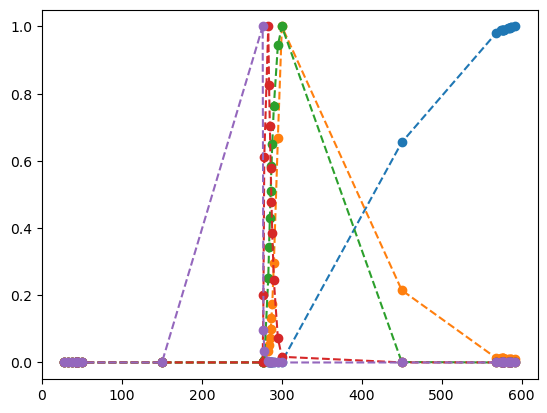

0
1
2
3
4


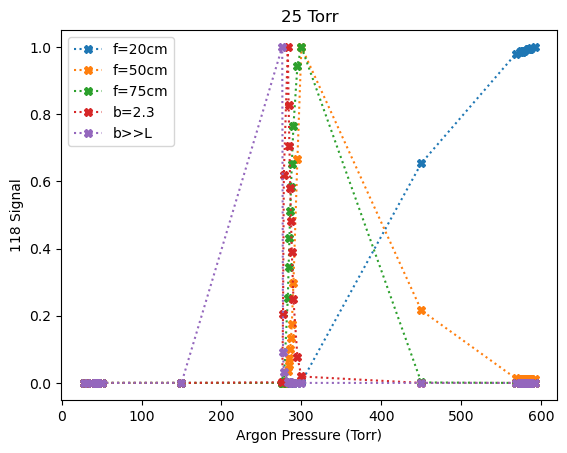

In [57]:

for i in range(0,5):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,1]/np.max(GBWA[i][:,1]),linestyle='dashed',marker ='o')
plt.show()
for i in range(0,5):
    print(i)
    plt.plot(PAr_int,GBNA[i][:,1]/np.max(GBNA[i][:,1]),linestyle='dotted',marker ='X')


plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')
plt.title('25 Torr')
plt.legend(['f=20cm','f=50cm','f=75cm','b=2.3','b>>L'])
plt.show()


In [159]:
np.where(GBWA[2][:,1] ==GBWA[2,:,1].max())


(array([6]),)

In [160]:
PAr_int[6]

315.7894736842105

0
1
2
3
4


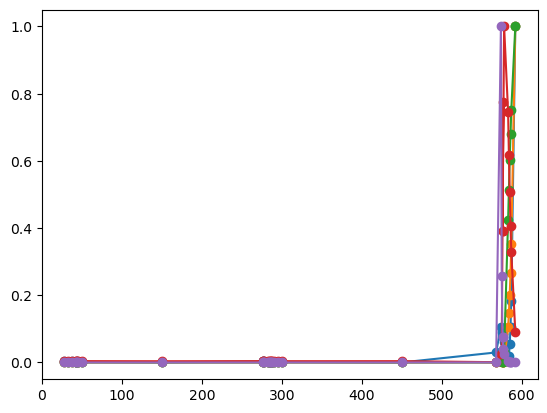

0
1
2
3
4


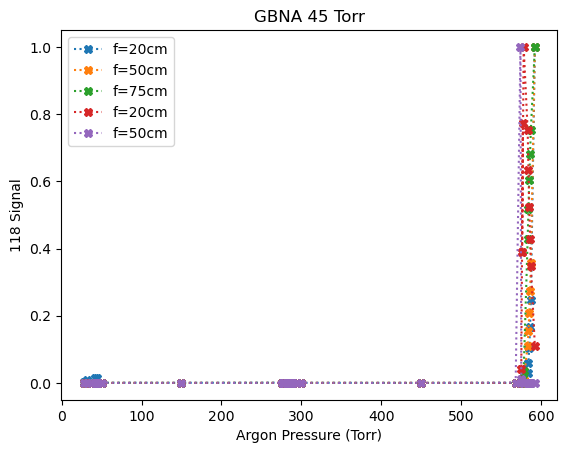

In [62]:

for i in range(0,5):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,2]/np.max(GBWA[i][:,2]),marker ='o')

plt.show()
for i in range(0,5):
    print(i)
    plt.plot(PAr_int,GBNA[i][:,2]/np.max(GBNA[i][:,2]),linestyle='dotted',marker ='X')


plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')
plt.title('GBNA 45 Torr')
plt.legend(['f=20cm','f=50cm','f=75cm','f=20cm','f=50cm','f=75cm'])
plt.show()


In [ ]:

for i in range(0,4):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,3],marker ='o')


for i in range(0,4):
    print(i)
    plt.plot(PAr_int,GBNA[i][:,],linestyle='dotted',marker ='X')


plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')
plt.title('GBNA 10 Torr')
plt.legend(['f=20cm','f=50cm','f=75cm','f=20cm','f=50cm','f=75cm'])
plt.show()


0


IndexError: index 3 is out of bounds for axis 1 with size 3

# Pressure Scans at Different focal lengths

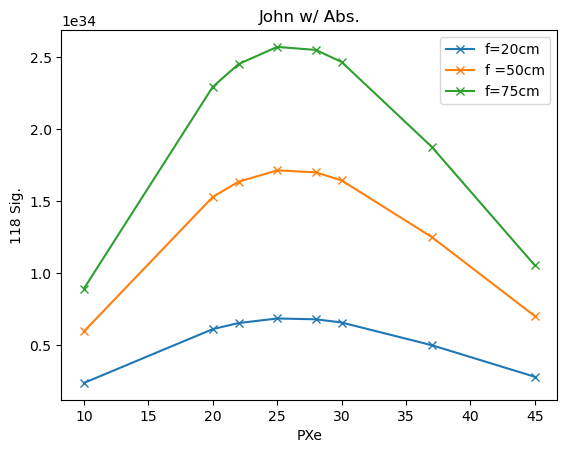

In [133]:
JWA_PM = JWA

for b_index in range(3):
    plt.plot(PXe_int,JWA_PM[b_index,:],marker = "x")

plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('John w/ Abs.')
plt.show()

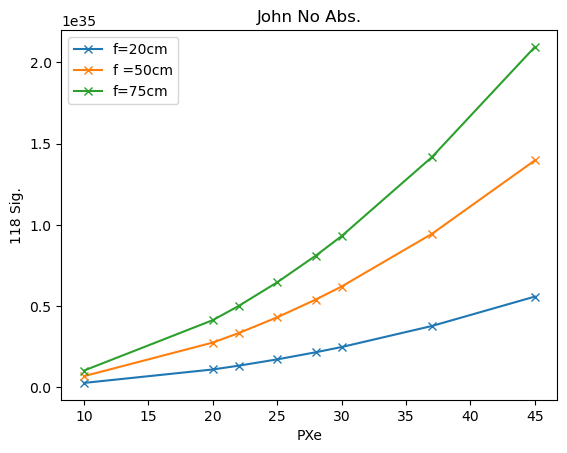

In [132]:
JNA_PM = JNA

for b_index in range(3):
    plt.plot(PXe_int,JNA_PM[b_index,:],marker = "x")

plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('John No Abs.')
plt.show()

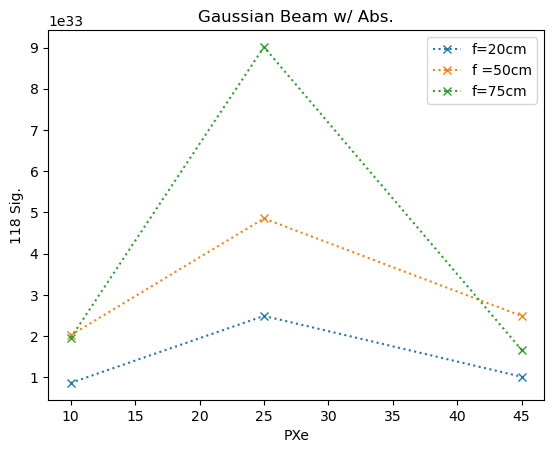

In [142]:
GBWA_PM = GBWA.max(axis =1)

for b_index in range(3):
    plt.plot(PXe_int,GBWA_PM[b_index,:],linestyle = ':',marker = "x")


plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('Gaussian Beam w/ Abs.')
plt.show()

# First Attempt at recreating Fig. 4 from johns paper (with low Res. Phasematch Curve figure)

In [36]:
R_opt = np.zeros((5,3))
for b_index in range(5):
   for PXe_index in range(3):
   #print(GBWA[b_index,:,0].max())
      maxVal = GBWA[b_index,:,PXe_index].max()
      critical_index = np.where(GBWA[b_index,:,PXe_index] == maxVal)
      R_opt[b_index,PXe_index] = PAr_int[critical_index]/PXe_int[PXe_index]



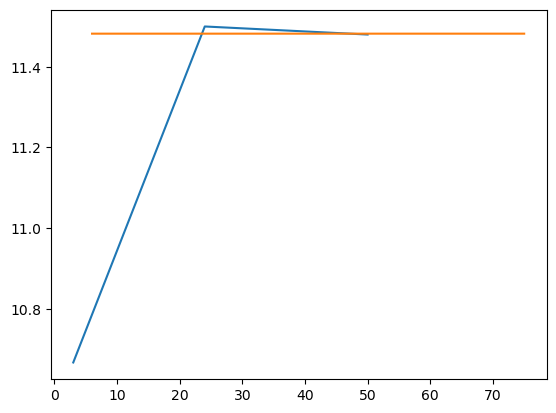

In [39]:
CXe= -6.12E-21 #m^2
CAr = 5.33E-22 #m^2

plt.plot(PXe_int,R_opt[4,:])
R = lambda Pxe : 2/(b_int[4] * Pxe*Torr_to_m3*CAr) - CXe/CAr

x =np.linspace(6,75)

plt.plot(x,R(x))

In [ ]:
GBWA[1,:,1].max()
GBWA[b_index,:,1].max()

4.9112689146960576e+33